# Demographics of Los Angeles County 

This notebook covers the demographics for Los Angeles County at the census block level. The data will be compared to the locations of publicly available toilets throughout the county to better understand some of the demographic characteristics of publicly avialble toilets and washing stations. 

In [21]:
#import libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import cenpy
from cenpy import products
cenpy.set_sitekey("84dcf311c461348accde34ab49515ec6e5d03e13", overwrite=True)
import json
import requests

In [63]:
# call race and ethnicity population census data using api

r = requests.get('https://api.census.gov/data/2019/acs/acs5?get=NAME,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03001_003E&for=tract:*&in=state:06%20county:037')
censusdata = r.json()
census_race = pd.DataFrame(censusdata[1:], columns=censusdata[0])
census_race.head()

,NAME,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03001_003E,state,county,tract
0,"Census Tract 4827.02, Los Angeles County, Cali...",2373,1364,178,27,4,1091,0,8,1009,06,037,482702
1,"Census Tract 5002.01, Los Angeles County, Cali...",7267,5056,4170,28,0,549,0,150,2211,06,037,500201
2,"Census Tract 5002.02, Los Angeles County, Cali...",4988,2707,1508,33,4,1039,0,66,2281,06,037,500202
3,"Census Tract 5003, Los Angeles County, California",2973,1364,838,0,0,469,0,15,1609,06,037,500300
4,"Census Tract 5005, Los Angeles County, California",2703,376,140,10,0,226,0,0,2327,06,037,500500


In [64]:
#clean up data, drop unnecessary columns
census_race.drop (columns=['NAME', 'state', 'county'], inplace=True)

In [65]:
#rename to something more understandable
census_race.rename(columns={'B03002_001E': 'total','B03002_002E': 'Non Hispanic','B03002_003E':'Non Hispanic White','B03002_004E':'Non Hispanic Black', 'B03002_005E':'Non Hispanic American Indian and Alaska Native','B03002_006E':'Non Hispanic Asian','B03002_007E':'Non Hispanic Native Hawaiian and Other Pacific Islander','B03002_008E':'Non Hispanic Some other race','B03001_003E':'Hispanic Latino'}, inplace=True)

In [79]:
#convert total_pop from object to integer
census_race = census_race.astype({'total':'int','Non Hispanic':'int','Non Hispanic White': 'int','Non Hispanic Black':'int','Non Hispanic American Indian and Alaska Native':'int','Non Hispanic Asian':'int','Non Hispanic Native Hawaiian and Other Pacific Islander':'int','Non Hispanic Some other race': 'int','Hispanic Latino': 'int'})

In [67]:
#set index in preparation for the join
census_race.set_index('tract', inplace=True)

In [72]:
census_race.head()

,total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Hispanic Latino
tract,,,,,,,,,
482702,2373,1364,178,27,4,1091,0,8,1009
500201,7267,5056,4170,28,0,549,0,150,2211
500202,4988,2707,1508,33,4,1039,0,66,2281
500300,2973,1364,838,0,0,469,0,15,1609
500500,2703,376,140,10,0,226,0,0,2327


**Sorting**

In [68]:
# I can now begin to sort my data so I can understand demographic changes by geography
race_sorted = census_race.sort_values(by='total',ascending = False)

In [73]:
race_sorted[['total']].head(10)

,total
tract,
901004,12463
275602,12100
265301,11977
910705,11613
901205,10783
920037,10318
702901,9852
300600,9609
206020,8947


I can see that my dataset only includes the tracts I need and doesn't include one for the entire LA County. Next I will create a column with percent totals. This will help with demographic analysis when I connect it with public toilet data. 

In [80]:
#I want to create a column with percent totals
census_race['Percent Non Hispanic'] = census_race['Non Hispanic']/census_race['total']*100
census_race['Percent Non Hispanic White'] = census_race['Non Hispanic White']/census_race['total']*100
census_race['Percent Non Hispanic Black'] = census_race['Non Hispanic Black']/census_race['total']*100
census_race['Percent Non Hispanic American Indian and Alaska Native'] = census_race['Non Hispanic American Indian and Alaska Native']/census_race['total']*100
census_race['Percent Non Hispanic Asian'] = census_race['Non Hispanic Asian']/census_race['total']*100
census_race['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = census_race['Non Hispanic Native Hawaiian and Other Pacific Islander']/census_race['total']*100
census_race['Percent Non Hispanic Some other race'] = census_race['Non Hispanic Some other race']/census_race['total']*100
census_race['Percent Hispanic Latino'] = census_race['Hispanic Latino']/census_race['total']*100

In [81]:
census_race.head()

,total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Hispanic Latino,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Hispanic Latino
tract,,,,,,,,,,,,,,,,,
482702,2373,1364,178,27,4,1091,0,8,1009,57.479983,7.501054,1.137800,0.168563,45.975558,0.0,0.337126,42.520017
500201,7267,5056,4170,28,0,549,0,150,2211,69.574790,57.382689,0.385303,0.000000,7.554699,0.0,2.064125,30.425210
500202,4988,2707,1508,33,4,1039,0,66,2281,54.270249,30.232558,0.661588,0.080192,20.829992,0.0,1.323176,45.729751
500300,2973,1364,838,0,0,469,0,15,1609,45.879583,28.187016,0.000000,0.000000,15.775311,0.0,0.504541,54.120417
500500,2703,376,140,10,0,226,0,0,2327,13.910470,5.179430,0.369959,0.000000,8.361080,0.0,0.000000,86.089530


Put this dataset to the side for a moment while I clean and prep the Census Tract gdf.

# Census Tract Geomerty Data

In [112]:
#bring in census tracts which I downloaded from LA County Open Data Portal
#set crs too

tractsGdf = gpd.read_file('Census Tracts 2010.geojson').to_crs(epsg='4326')

In [113]:
# slice the geoid column so that it matches the 'tract' column from our census_pop_df
# this is to prepare it for a join on the index

tractsGdf['short_geoid'] = tractsGdf['geoid10'].str.slice(5,11)

In [114]:
tractsGdf.head()

,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,geometry,short_geoid
0,4025735684.42,9110.01,6620403.0,911001,1998891.0,06037911001,353933.808192,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",911001
1,2078689856.02,9800.03,6575300.0,980003,2112006.0,06037980003,273188.86321,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",980003
2,11118018325.1,9303.01,6603027.0,930301,1932124.0,06037930301,628603.531323,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",930301
3,4824001.88224,5730.03,6500215.0,573003,1747305.0,06037573003,9050.00845755,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",573003
4,6697030.7108,2976.02,6473372.0,297602,1719119.0,06037297602,12308.3153848,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",297602


In [115]:
#set the index
tractsGdf.set_index('short_geoid', inplace=True)

# Join the Data

In [116]:
# bring back census_race to join on index
raceGdf = tractsGdf.join (census_race)

In [117]:
#check if the join worked
raceGdf.head()

,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,geometry,total,Non Hispanic,...,Non Hispanic Some other race,Hispanic Latino,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Hispanic Latino
short_geoid,,,,,,,,,,,,,,,,,,,,,
911001,4025735684.42,9110.01,6620403.0,911001,1998891.0,06037911001,353933.808192,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",3926.0,2245.0,...,0.0,1681.0,57.182883,48.726439,4.457463,0.000000,1.299032,0.000000,0.000000,42.817117
980003,2078689856.02,9800.03,6575300.0,980003,2112006.0,06037980003,273188.86321,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930301,11118018325.1,9303.01,6603027.0,930301,1932124.0,06037930301,628603.531323,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",796.0,611.0,...,0.0,185.0,76.758794,56.030151,8.165829,0.000000,1.758794,0.753769,0.000000,23.241206
573003,4824001.88224,5730.03,6500215.0,573003,1747305.0,06037573003,9050.00845755,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",1843.0,1005.0,...,7.0,838.0,54.530657,24.959305,5.425936,0.596853,20.781335,0.000000,0.379816,45.469343
297602,6697030.7108,2976.02,6473372.0,297602,1719119.0,06037297602,12308.3153848,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",3687.0,2260.0,...,2.0,1427.0,61.296447,44.290751,3.390290,0.244101,8.950366,0.542446,0.054245,38.703553


In [118]:
# prepping the data to join to all toliets, so I will reset the index
raceGdf.reset_index(inplace=True)

In [119]:
#change this column to an integer so i can join on integer later
raceGdf = raceGdf.astype({'short_geoid':'int'})

In [90]:
#reset the index
raceGdf.set_index('short_geoid', inplace=True)

<AxesSubplot:>

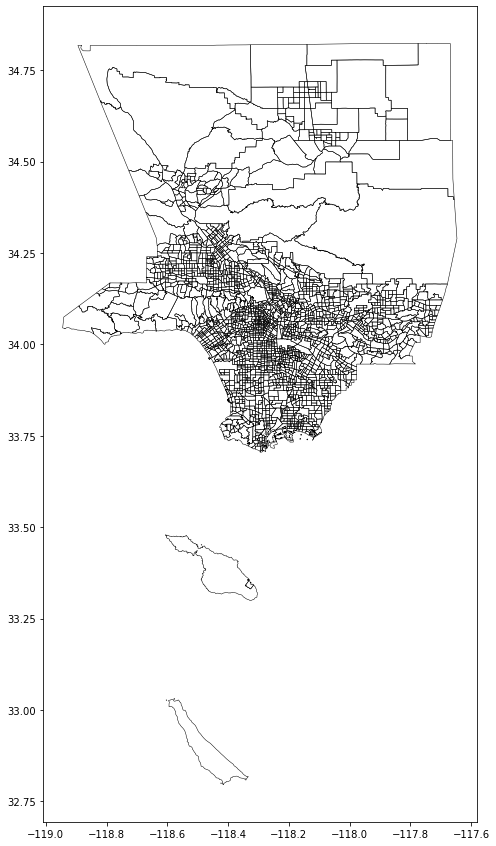

In [120]:
fig,ax = plt.subplots(figsize=(15,15))

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
raceGdf.boundary.plot(ax=ax,color='black',zorder=15,lw=0.5)

<AxesSubplot:>

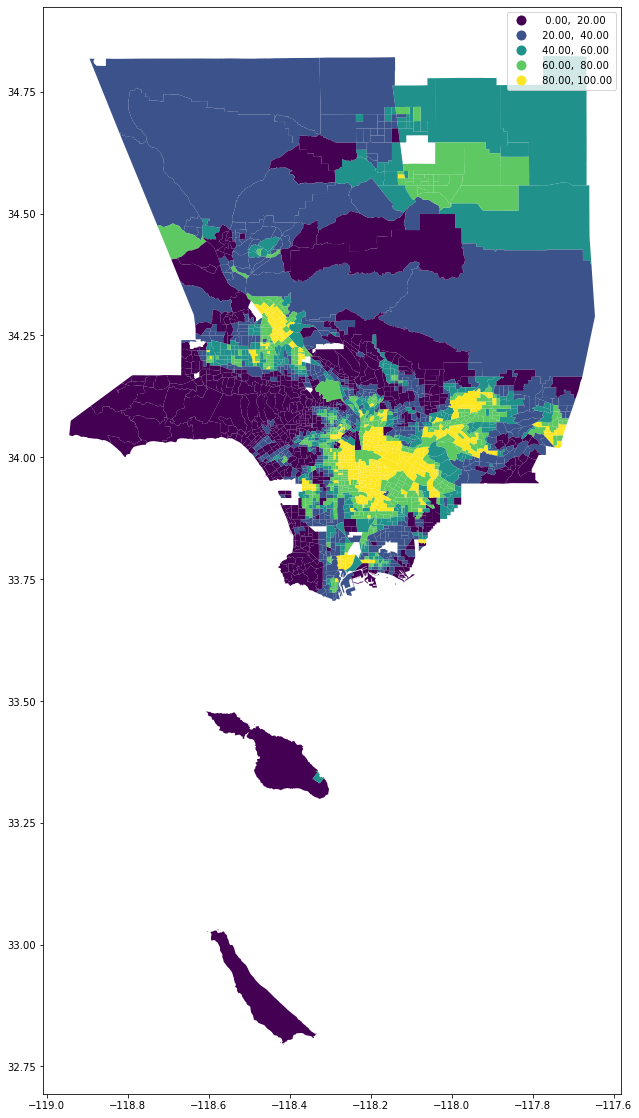

In [121]:
#now I want to map the percentage of Latinx populations since literature suggests there are high populations living in mobile homes.
raceGdf.plot(figsize=(20,20),
         column='Percent Hispanic Latino',
         legend=True,
         scheme='equal_interval')

I want to undestand the demographics of the areas with higher concentrations of public toilets. Where is there more non-white, Black, Indigenous, People of Color (BIPOC) concenrations? I will need to create a new column.

In [145]:
raceGdf['Percent Non white'] = raceGdf['Percent Non Hispanic Black'] + raceGdf['Percent Non Hispanic American Indian and Alaska Native'] + raceGdf['Percent Non Hispanic Asian'] + raceGdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + raceGdf['Percent Non Hispanic Some other race'] + raceGdf['Percent Hispanic Latino']

In [146]:
raceGdf['Non white'] = raceGdf['Non Hispanic Black'] + raceGdf['Non Hispanic American Indian and Alaska Native']+ raceGdf['Non Hispanic Asian'] + raceGdf['Non Hispanic Native Hawaiian and Other Pacific Islander'] + raceGdf['Non Hispanic Some other race'] + raceGdf['Hispanic Latino']

In [136]:
raceGdf.head()

,short_geoid,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,geometry,total,...,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Hispanic Latino,Percent Non white,Non white
0,911001,4025735684.42,9110.01,6620403.0,911001,1998891.0,06037911001,353933.808192,"MULTIPOLYGON (((-117.66712 34.55801, -117.6671...",3926.0,...,57.182883,48.726439,4.457463,0.000000,1.299032,0.000000,0.000000,42.817117,48.573612,1907.0
1,980003,2078689856.02,9800.03,6575300.0,980003,2112006.0,06037980003,273188.86321,"MULTIPOLYGON (((-117.88061 34.76362, -117.8825...",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,930301,11118018325.1,9303.01,6603027.0,930301,1932124.0,06037930301,628603.531323,"MULTIPOLYGON (((-117.65524 34.39722, -117.6551...",796.0,...,76.758794,56.030151,8.165829,0.000000,1.758794,0.753769,0.000000,23.241206,34.673367,276.0
3,573003,4824001.88224,5730.03,6500215.0,573003,1747305.0,06037573003,9050.00845755,"MULTIPOLYGON (((-118.19923 33.79712, -118.1992...",1843.0,...,54.530657,24.959305,5.425936,0.596853,20.781335,0.000000,0.379816,45.469343,72.056430,1328.0
4,297602,6697030.7108,2976.02,6473372.0,297602,1719119.0,06037297602,12308.3153848,"MULTIPOLYGON (((-118.28798 33.72258, -118.2879...",3687.0,...,61.296447,44.290751,3.390290,0.244101,8.950366,0.542446,0.054245,38.703553,52.183347,1924.0


In [124]:
#I want to ensure then entegrity of my data
percent_random_tract = raceGdf.sample()
percent_random_tract

,short_geoid,shape_area,label,x_center,ct10,y_center,geoid10,shape_len,geometry,total,...,Hispanic Latino,Percent Non Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Hispanic Latino,Percent Non white
583,139703,50898928.2781,1397.03,6400672.0,139703,1875423.0,06037139703,41376.8014138,"MULTIPOLYGON (((-118.53225 34.16201, -118.5318...",2861.0,...,28.0,99.021321,80.601188,3.914715,0.0,6.431318,0.0,0.0,0.978679,11.324712


In [125]:
percent_random_tract.iloc[0]['Percent Non white']

11.324711639286962

In [126]:
(percent_random_tract.iloc[0]['Percent Non Hispanic Black'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Asian'] + 
      percent_random_tract.iloc[0]['Percent Non Hispanic Some other race'] + 
      percent_random_tract.iloc[0]['Percent Hispanic Latino'] +
      percent_random_tract.iloc[0]['Percent Non Hispanic American Indian and Alaska Native'])

11.324711639286962

<AxesSubplot:>

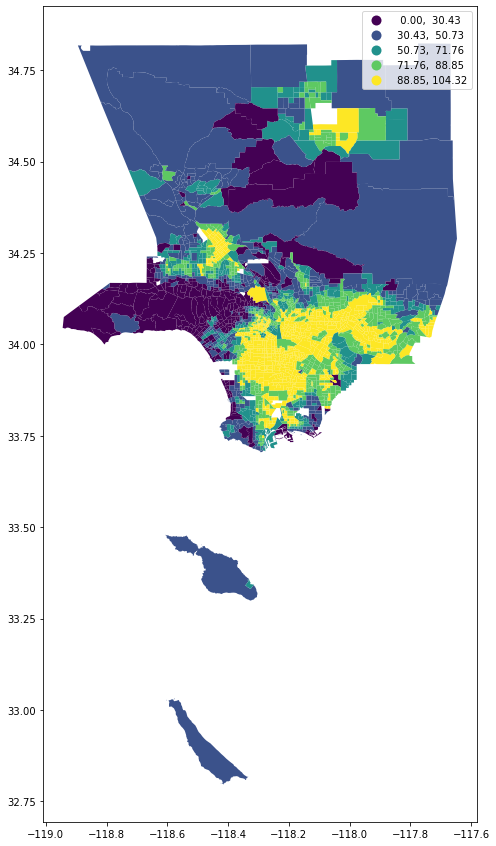

In [127]:
raceGdf.plot(figsize=(20,15),
                 column='Percent Non white',
                 legend=True, 
                 scheme='NaturalBreaks')

In [128]:
# Now I will see the the demographics side by side
race_web_mercator = raceGdf.to_crs(epsg=4326)

Text(0.5, 1.0, 'Percent Non Hispanic White')

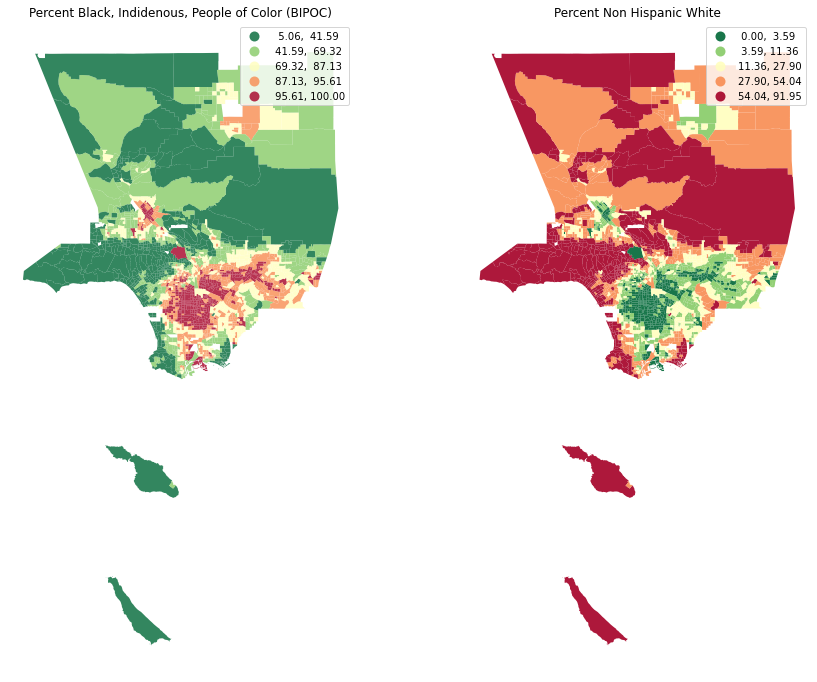

In [147]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
raceGdf.plot(column='Percent Non white', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.80, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Black, Indidenous, People of Color (BIPOC)")

# percent black map on the right
raceGdf.plot(column='Percent Non Hispanic White', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.90, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

# Bring in Public Toilets Data 

In [130]:
#bring in all public toilets data
toilets = gpd.read_file('alltoilets.geojson').to_crs(epsg='4326')

In [131]:
toilets.head()

,name,type,branch_name,geometry
0,Augustus F. Hawkins Natural Park,LA Parks,None,POINT (-118.24786 34.01386)
1,Bird Sanctuary,LA Parks,None,POINT (-118.29180 34.10518)
2,Bishop Canyon,LA Parks,None,POINT (-118.23659 34.07990)
3,Brand Park,LA Parks,None,POINT (-118.46116 34.27229)
4,Branford Recreation Center,LA Parks,None,POINT (-118.42319 34.23351)


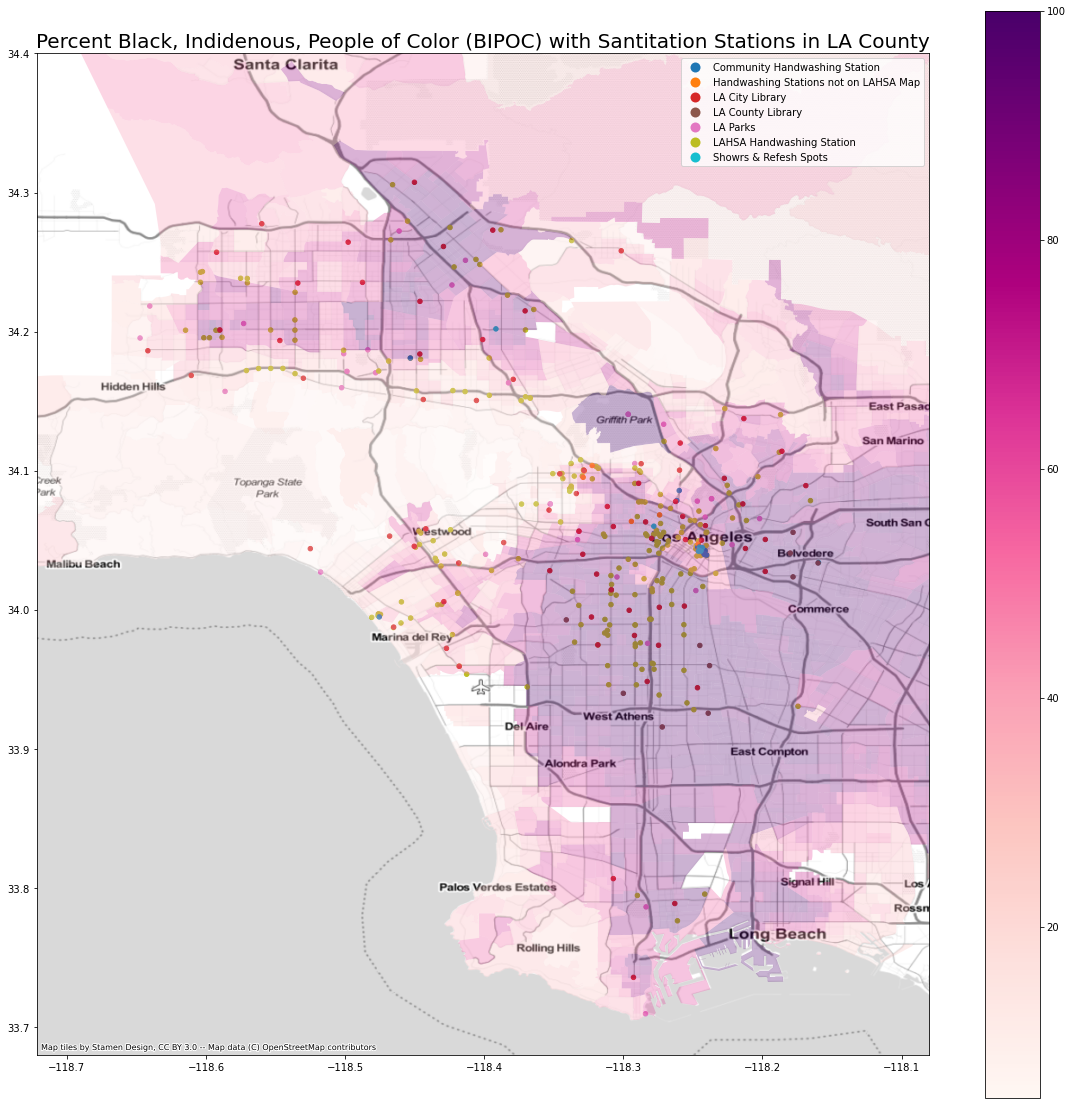

In [148]:
#LA county wide map

f, ax = plt.subplots(figsize=(20,20))

toilets.plot('type', ax=ax, marker='o', markersize=20, legend=True)

raceGdf.plot('Percent Non white', 
            ax=ax, 
            cmap='RdPu', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')
ax.set_xlim([-118.721783, -118.08]) 
ax.set_ylim([33.68, 34.4])
ax.set_title('Percent Black, Indidenous, People of Color (BIPOC) with Santitation Stations in LA County', fontsize=20)

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

plt.show()

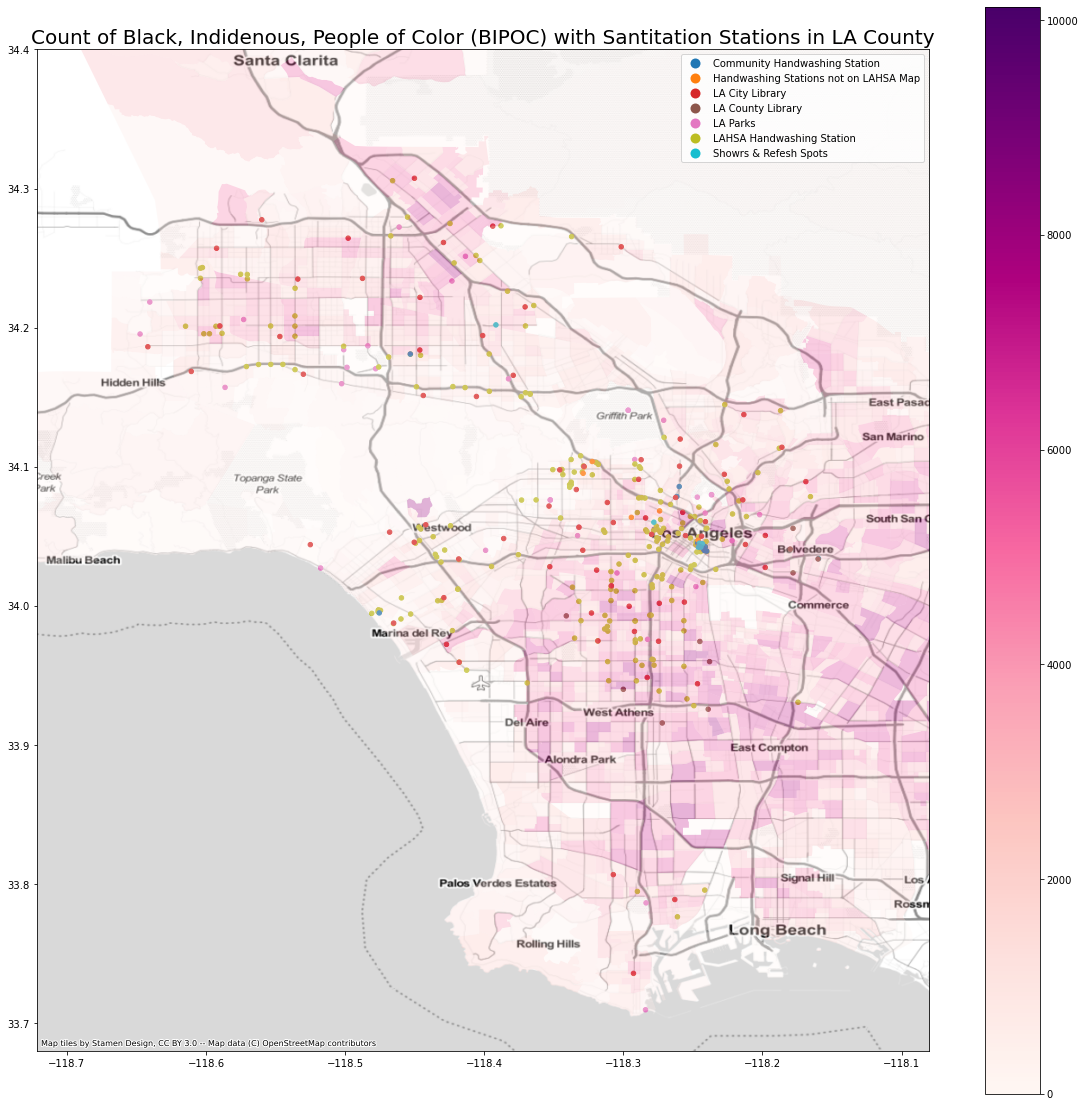

In [149]:
#LA county wide map

f, ax = plt.subplots(figsize=(20,20))

toilets.plot('type', ax=ax, marker='o', markersize=20, legend=True)

raceGdf.plot('Non white', 
            ax=ax, 
            cmap='RdPu', 
            legend=True, 
            legend_kwds={'orientation': 'vertical'}, 
            alpha=0.3, 
            label='Count')
ax.set_xlim([-118.721783, -118.08]) 
ax.set_ylim([33.68, 34.4])
ax.set_title('Count of Black, Indidenous, People of Color (BIPOC) with Santitation Stations in LA County', fontsize=20)

ctx.add_basemap(ax,crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)

plt.show()